# Data Cleaning for Real Estate Analysis: The Saga Begins (again!)

## Let it be known that this time I will be flying solo. No project partner!

In [ ]:
def Han (Star Wars):
    return (Solo)

## Ok, let's begin. Import all necessary libraries and read the csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

df = pd.read_csv ('kc_house_data.csv') 

In [118]:
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [4]:
df.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### What do we notice upon first glance?
- Some weird outliers:
    - Max Bedrooms = 33
    - Max Bathrooms = 8
    - Max Sqft_living = 13540
    - Min Sqft_living = 370 
        - With a median of 1910 sqft_living, the min and max are fascinating.
- Median and even  the 75% Quartile of Views is 0. Do we need this column?
- Year Built is between 1900 and 2015
- The minimum yr_renovated is 0? 
    - It may be possible that 0 denotes not-renovated.
- Zipcodes are 98001 - 98199
- Lat is 47.155900 - 47.777600
- Long is -122.519000 - -121.31500

In [10]:
df.waterfront.isna().sum()

2376

In [11]:
df.yr_renovated.isna().sum()

3842

In [12]:
df.yr_renovated.describe()

count    17755.000000
mean        83.636778
std        399.946414
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [13]:
# NaNs in yr_renovated are 22%. Cannot just drop those rows. Must think of a different way to handle them. May use the median.

In [14]:
df.view.unique()

# Question: What is view, exactly? I get different answers depending on where I look
# The Md says it means "Has been viewed" but other places say it may mean "Quality of view"--what would 0 mean?

array([ 0., nan,  3.,  4.,  2.,  1.])

In [15]:
df.view.isna().sum()

63

### First thoughts:
- Question Marks in the sqft_basement column--very interesting. Do I need that column? Is it relevant?
- Yr_Renovated seems like it is relevant enough to keep around but those NaNs need scrubbing. 
- I lean towards marketing this information to a stakeholder group representing first-time home-buyers
- I would like to focus on prices under 500,000.
    - According to research, the median income for those between the ages of 25 and 44 in King County is 99,000 dollars.
        - Unfortunately, the information about average income was unavailable. 
- Will focus on houses in the aforementioned range with a focus on grade, condition, and sqft_living
- This will inform my focus during investigation. For now, however, I need to see my models do some work!

In [16]:
# Separate variables into categorical and continuous

cats = []
conts = []

for col in df.columns:
    if df[col].nunique() <= 100:
        cats.append(col)
    else:
        conts.append(col);

print (cats)
print (conts)


['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_renovated', 'zipcode']
['id', 'date', 'price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


,id,price,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,2080.321850,1.509941e+04,1788.596842,1970.999676,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,918.106125,4.141264e+04,827.759761,29.375234,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,370.000000,5.200000e+02,370.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,1430.000000,5.040000e+03,1190.000000,1951.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,1910.000000,7.618000e+03,1560.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,2550.000000,1.068500e+04,2210.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,13540.000000,1.651359e+06,9410.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


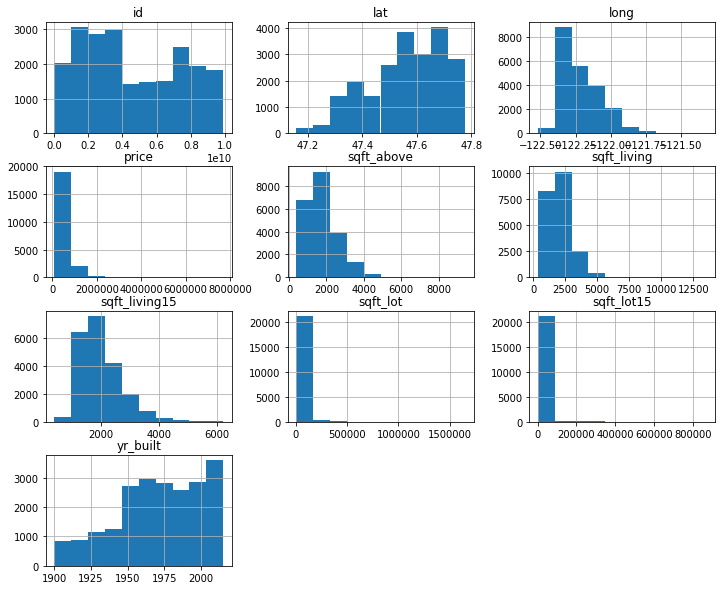

In [17]:
# Turn these lists into DataFrames. Start with conts.

df_conts = df.loc[:, conts]
df_conts.hist(figsize=(12,10))
df_conts.describe()

In [18]:
# Experiment with a baseline model

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols

outcome = 'price'

x_cols = df.drop(['price', 'date', 'sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f,data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                   OLS                   Adj. R-squared:          0.701      
Dependent Variable:      price                 AIC:                     430090.8562
Date:                    2020-07-27 01:01      BIC:                     430228.8327
No. Observations:        15762                 Log-Likelihood:          -2.1503e+05
Df Model:                17                    F-statistic:             2174.      
Df Residuals:            15744                 Prob (F-statistic):      0.00       
R-squared:               0.701                 Scale:                   4.1441e+10 
-----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025        0.975]   
-----------------------------------------------------------------------------------
Intercept     5302250.8039 3478624.8563   1.5242 0.1275 -1516252.8213 12120754.4290
bedrooms       -37498.7849    2219.5646 -16.8947 0.0000   -41849.3860   -33148.1838
bathrooms       44686.0252    3864.2123  11.5641 0.0000    37111.7259    52260.3245
sqft_living       154.5053       5.1688  29.8917 0.0000      144.3738      164.6369
sqft_lot            0.0939       0.0562   1.6698 0.0950       -0.0163        0.2040
floors           4029.0029    4268.3982   0.9439 0.3452    -4337.5471    12395.5529
waterfront     609833.7233   20547.6719  29.6790 0.0000   569557.9301   650109.5165
view            52830.6894    2552.7403  20.6957 0.0000    47827.0257    57834.3532
condition       26532.2196    2785.4886   9.5252 0.0000    21072.3426    31992.0966
grade           93751.2669    2570.6596  36.4697 0.0000    88712.4792    98790.0546
sqft_above         38.2463       5.1380   7.4439 0.0000       28.1753       48.3173
yr_built        -2674.2510      85.9581 -31.1111 0.0000    -2842.7386    -2505.7633
yr_renovated       19.8281       4.3677   4.5397 0.0000       11.2668       28.3894
zipcode          -571.0855      39.0778 -14.6141 0.0000     -647.6824     -494.4886
lat            604021.2106   12695.4957  47.5776 0.0000   579136.5833   628905.8380
long          -217438.3999   15570.8080 -13.9645 0.0000  -247958.9691  -186917.8307
sqft_living15      15.6360       4.1095   3.8049 0.0001        7.5810       23.6911
sqft_lot15         -0.3382       0.0846  -3.9975 0.0001       -0.5041       -0.1724
-----------------------------------------------------------------------------------
Omnibus:                  13694.698          Durbin-Watson:             1.980      
Prob(Omnibus):            0.000              Jarque-Bera (JB):          1491014.115
Skew:                     3.668              Prob(JB):                  0.000      
Kurtosis:                 50.080             Condition No.:             216078398  
===================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

## Items of Note in the Baseline Model:

- R-Squared is .701
- We used summary2 to remove R-Squared because it is susceptible to manipulation.

#### Plan of Attack:

1. Finish cleaning: Drop what you need to drop, keep what you need to keep.

2. Evaluate whether or not zip codes matter. If they do, bin those bad boys.

3. Finish this notebook with a final CSV then head to the next one and keep building out the model until you have a good MSE and perhaps an R-Squared too! Keep in mind that sometimes, even if the R-Squared doesn't move much, a correlation or a P-Value may be significantly affected. Keep a close eye on everything and your model will be great in no time!

4. Additionally, be sure to account for multicollinearity.

5. In the end , your models should be complete and your investigation should be underway--try to come to some cool conclusions, visualize them, write your ReadME, film your video, Push everything to the Master Branch, write your powerpoint. Submit submit submit!

## AND WE'RE BACK! Finish the Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Date & sqft_basement are objects. Let's see why and take care of business.

In [27]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
276.0         1
508.0         1
2610.0        1
2570.0        1
2240.0        1
Name: sqft_basement, Length: 304, dtype: int64

Aha! A question mark! This may be the issue. Let's see if we can't turn these into NaNs (Creating a new problem that will be easier to handle)

In [34]:
df.sqft_basement.replace('?',np.NaN, inplace = True)

In [35]:
df.sqft_basement.value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
276.0         1
508.0         1
2610.0        1
2570.0        1
2240.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [36]:
df.sqft_basement.isna().sum()

454

Success! If you notice above when we called df.info(), sqft_basement showed 0 NaNs and now it shows 454, the same amount as there were previously ?s. This is only about 2% of the dataset so we can drop these rows and move forward.

In [42]:
df.sqft_basement.value_counts()

0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
276.0         1
508.0         1
2610.0        1
2570.0        1
2240.0        1
Name: sqft_basement, Length: 303, dtype: int64

In [56]:
df.dropna(subset = ["sqft_basement"], inplace=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


Let's investigate Waterfront now and see what to do about these NaNs. Shall we set them to zero? 

In [61]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [62]:
df.waterfront.isna().sum()

2339

In [64]:
df.waterfront.value_counts()

0.0    18662
1.0      142
Name: waterfront, dtype: int64

In [68]:
# It seems ok to turn these NaNs into zero. An incredibly large majority of the houses are not on the waterfront. 

df.waterfront = df.waterfront.fillna(0)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 21 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(9), int64(11), object(1)
memory usage: 3.5+ MB


This leaves us with view and yr_renovated. Let's drop the column "view" as it seems to be ambiguous. We don't know if it means number of times viewed or quality of the view from the house (and if so, quality of view from where? Does not seem relevant for stakeholders)

In [70]:
del df['view']

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.4+ MB


**One task remains with NaN cleaning: yr_renovated.**

In [83]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.114300e+04,2.114300e+04,21143.000000,21143.000000,21143.000000,2.114300e+04,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,21143.000000,17389.000000,21143.000000,21143.000000,21143.000000,21143.00000,21143.000000
mean,4.581004e+09,5.405107e+05,3.372558,2.116079,2080.920730,1.508714e+04,1.493591,0.006716,3.409923,7.658279,1789.069006,291.851724,1971.023223,82.991949,98077.868893,47.560274,-122.213876,1987.27139,12738.941967
std,2.876328e+09,3.680751e+05,0.924917,0.768531,918.547562,4.120920e+04,0.539249,0.081679,0.650498,1.174253,828.409769,442.498337,29.321938,398.481819,53.535756,0.138591,0.140597,685.67034,27169.273663
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.00000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.043000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,47.471250,-122.328000,1490.00000,5100.000000
50%,3.904940e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.230000,1840.00000,7626.000000
75%,7.309100e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069550e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2360.00000,10087.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.00000,871200.000000


#### As we are reminded using df.describe(), over 75% of the values for the column yr_renovated are 0. It seems safe to replace the NaNs with 0 as those houses, more than likely, were not renovated. 

In [84]:
df.yr_renovated = df.yr_renovated.fillna(0)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 20 columns):
id               21143 non-null int64
date             21143 non-null object
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     21143 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 4.0+ MB


Finished with the NaNs! Now to handle the DateTime and move on. 

In [88]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21143, dtype: object

In [90]:
df.date.unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015', '5/27/2014',
       '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014', '5/29/2014',
       '4/24/2015', '5/14/2014', '8/26/2014', '7/3/2014', '5/16/2014',
       '11/20/2014', '11/3/2014', '6/26/2014', '12/1/2014', '6/24/2014',
       '3/2/2015', '11/10/2014', '12/3/2014', '6/13/2014', '12/30/2014',
       '2/13/2015', '6/20/2014', '7/15/2014', '8/11/2014', '10/28/2014',
       '7/29/2014', '7/18/2014', '3/25/2015', '7/16/2014', '4/28/2015',
       '3/11/2015', '9/16/2014', '2/17/2015', '12/31/2014', '2/5/2015',
       '3/3/2015', '8/19/2014', '4/7/2015', '8/27/2014', '2/23/2015',
       '12/10/2014', '8/28/2014', '10/21/2014', '12/7/2014', '6/3/2014',
       '9/9/2014', '10/9/2014', '8/25/2014', '6/12/2014', '9/12/2014',
       '1/5/2015', '6/10/2014', '7/10/2014', '3/16/2015', '11/5/2014',
       '4/20/2015', '6/9/2014', '12/2/2014', '12/22/2014', '1/28/

In [99]:
# Idea: Divide Date into two categories: Day of Year and Month. Don't Need Year

import datetime as dt

df['date'] = pd.to_datetime(df['date'])
df['day_of_year'] = df['date'].dt.dayofyear
df['month'] = df['date'].dt.month
display(df.day_of_year.values,df.month.values)

array([286, 343,  56, ..., 174,  16, 288], dtype=int64)

array([10, 12,  2, ...,  6,  1, 10], dtype=int64)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 22 columns):
id               21143 non-null int64
date             21143 non-null datetime64[ns]
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     21143 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
day_of_year      21143 non-null int64
month            21143 non-null int64
dtypes: datetime64[ns](1), flo

No Objects! Will bin things later. Now for a quick analysis of the top 5 values in each column and some scatter plots:

In [107]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Imported for later

In [109]:
for col in df.columns:
    print (col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 795000620     0.000142
9238500040    0.000095
8062900070    0.000095
8161020060    0.000095
5430300171    0.000095
Name: id, dtype: float64 


date 
 2014-06-23    0.006574
2014-06-25    0.006149
2014-07-08    0.005959
2014-06-26    0.005912
2015-03-25    0.005770
Name: date, dtype: float64 


price 
 350000.0    0.007946
450000.0    0.007899
550000.0    0.007331
500000.0    0.007047
425000.0    0.006905
Name: price, dtype: float64 


bedrooms 
 3    0.455896
4    0.318782
2    0.127276
5    0.073783
6    0.012392
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.248546
1.00    0.177695
1.75    0.141465
2.25    0.095256
2.00    0.089202
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006385
1400    0.006338
1440    0.006149
1010    0.006007
1660    0.006007
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016459
6000    0.013527
4000    0.011540
7200    0.010311
7500    0.005628
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.494537
2.0    0.381497
1.

### Observations from Top 5 Vals:
- Looking at the date column, June seems like the most popular month to sell houses (But this may be due to houses being sold multiple times. Will confirm below about which months and days, in particular, are most popular for sales)
- All but one of the most popular prices is within my firm's range (I would like to pitch houses that don't exceed 500,000 dollars)
- Large majority of houses have between 3 & 4 bedrooms (2 BR houses are also decently popular with a share of 12% of the data)
- 2.5 Bathrooms are most popular (almost 25% of data)
- Not many houses with floors outside of the 1-2 range
- Waterfront looks incredibly insignificant (99.328% of houses sold are not on the waterfront) especially for first-time buyers
    - However this column may be good to include in the model for the sake of a solid R-Squared
- Over 91% of houses sold have a condition between 3 and 4
- Over 81% of houses sold have a grade between 7 and 9
- 60.66% of houses sold have no basement
- Earliest year for top 5 vals of yr_built is 2003 (Mid-00s generally seem like a popular year for a house to be built in this dataset.
- Top 5 Zipcodes: 98103, 98038, 98115, 98052, 98042 (Would like to split into sectors for further analysis)
    - 98103: Center of Seattle. Includes Woodland Park
    - 98038: Maple Valley, Washington. Seems like a suburb far from Seattle (47 minute drive) 
    - 98115: East Side of Seattle. Includes Warren G Magnuson Park
    - 98052: Redmond. Includes Marymore Park 
    - 98042: Kent. Includes Soos Creek Park 
- May 5-8 are among the 5 most popular days for houses to sell (Unsure how this helps buyers but it may affect price?)
- April - August are the 5 most popular months for houses to sell (May and April being top two respectively)
    - Does this mean this is when folks *should* buy though?

### Now for a quick series of scatter plots

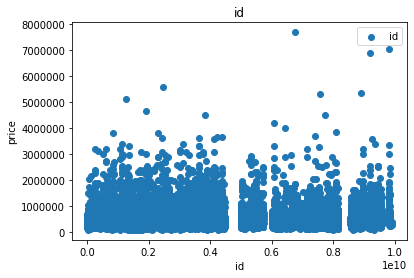

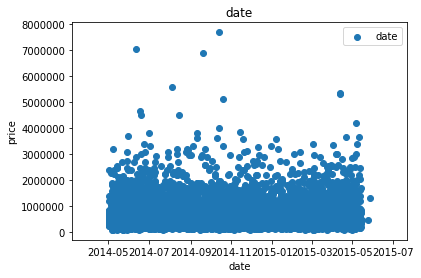

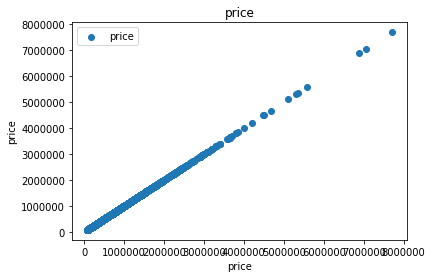

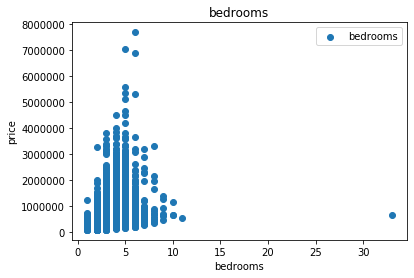

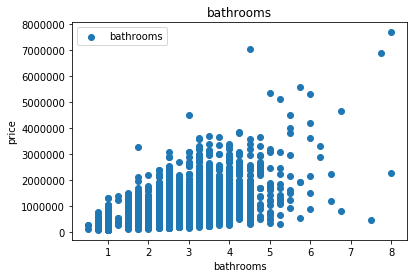

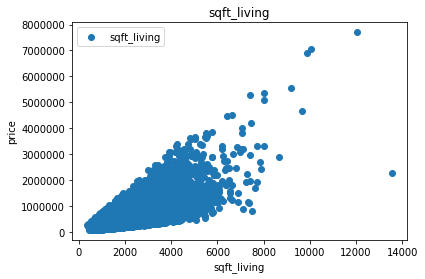

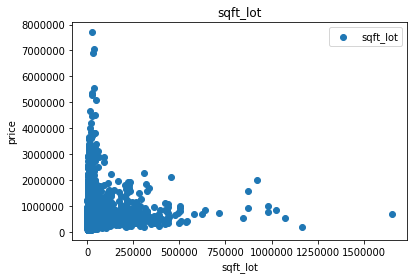

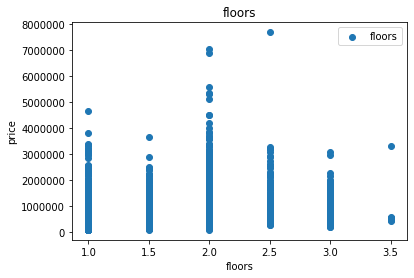

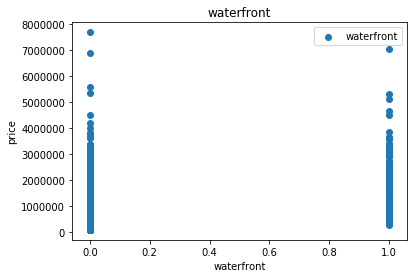

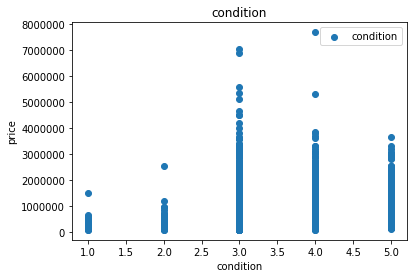

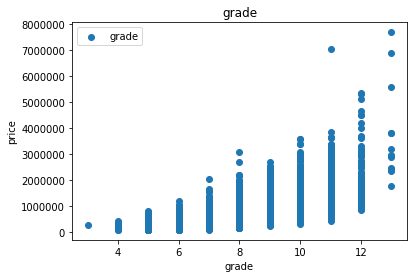

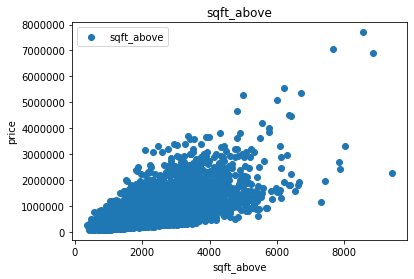

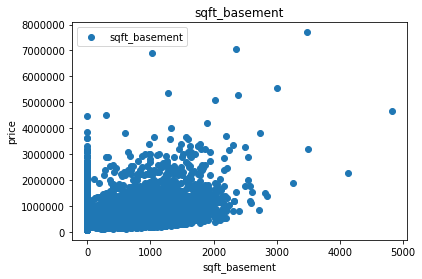

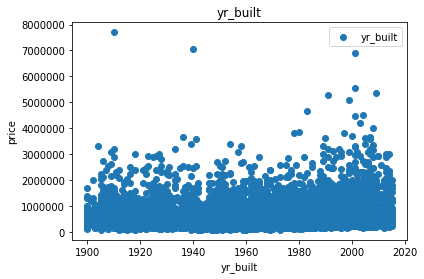

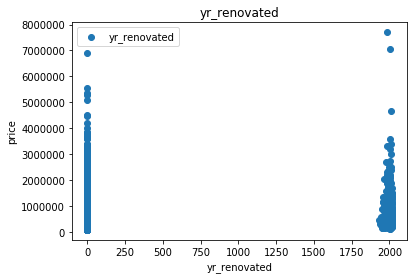

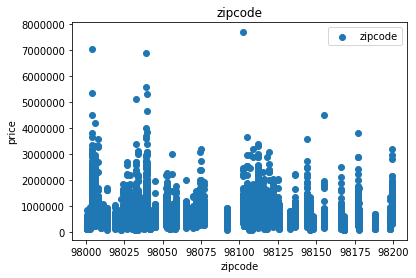

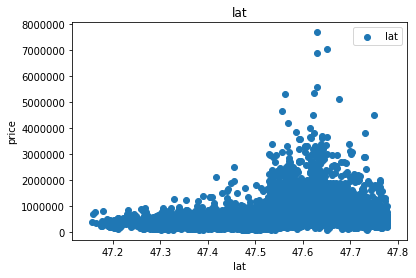

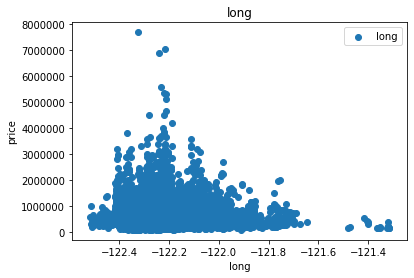

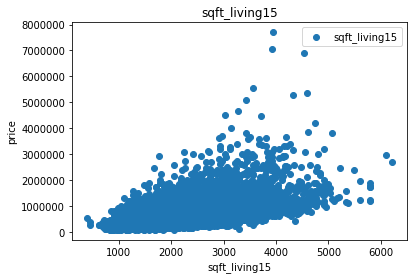

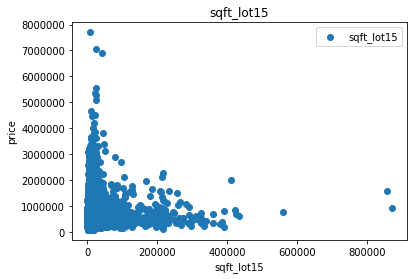

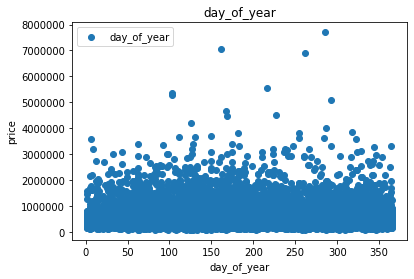

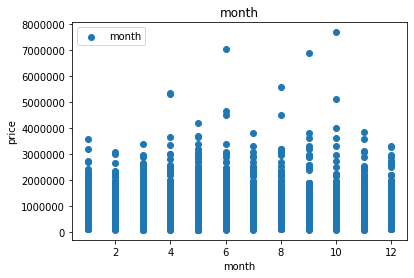

In [110]:
for col in df.columns:
    plt.scatter(df[col], df.price, label=col)
    plt.legend()
    plt.xlabel(col)
    plt.ylabel('price')
    plt.title(col)
    plt.show()

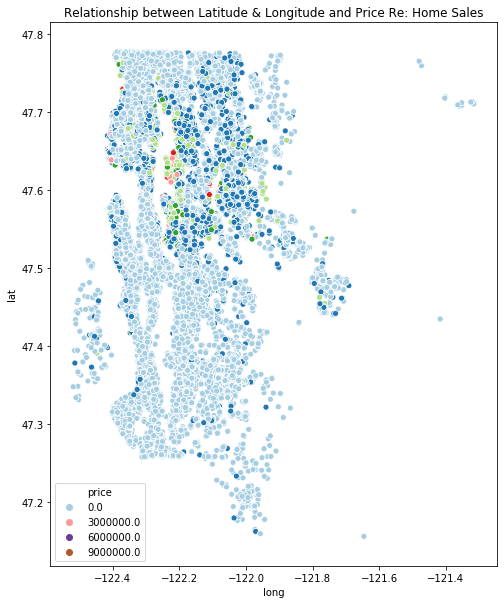

In [111]:
# Create a map displaying the relationship between longitude and latitude and price. 
# This may help us later on create sectors & quadrants

plt.figure(figsize=(8,10))
sns.scatterplot(x='long', y='lat', hue='price', data=df, palette='Paired')
plt.title('Relationship between Latitude & Longitude and Price Re: Home Sales')
plt.legend(fancybox=True)

### Observations from Map:
- Prices around what appear to be the center of Seattle are clearly higher than everywhere else. 
- The common sense decision to not move into the center of a city as a first-time home buyer seem to hold true here.

 ## Let's Create Our Next Model (Post-Cleaning), Save our DF and head into Feature Engineering

In [112]:
outcome = 'price'

x_cols = df.drop(['price', 'date', 'sqft_basement', 'id'], axis=1).columns
predictors = '+'.join(x_cols)

f = outcome + '~' + predictors

model = smf.ols(formula=f,data=df).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS                  Adj. R-squared:         0.692      
Dependent Variable:       price                AIC:                    577057.9404
Date:                     2020-07-27 18:20     BIC:                    577209.1626
No. Observations:         21143                Log-Likelihood:         -2.8851e+05
Df Model:                 18                   F-statistic:            2640.      
Df Residuals:             21124                Prob (F-statistic):     0.00       
R-squared:                0.692                Scale:                  4.1723e+10 
----------------------------------------------------------------------------------
                 Coef.       Std.Err.      t     P>|t|      [0.025       0.975]   
----------------------------------------------------------------------------------
Intercept     -726150.7620 2987578.3420  -0.2431 0.8080 -6582032.2436 5129730.7197
bedrooms       -39822.5849    1945.7308 -20.4666 0.0000   -43636.3658  -36008.8040
bathrooms       43063.2754    3348.0219  12.8623 0.0000    36500.8972   49625.6537
sqft_living       167.3777       4.4596  37.5316 0.0000      158.6364     176.1189
sqft_lot            0.1514       0.0496   3.0545 0.0023        0.0542       0.2485
floors           9721.4809    3697.7364   2.6290 0.0086     2473.6353   16969.3264
waterfront     789293.3156   17457.9612  45.2111 0.0000   755074.3798  823512.2515
condition       28233.2405    2406.5964  11.7316 0.0000    23516.1281   32950.3530
grade          100993.0498    2207.0610  45.7591 0.0000    96667.0418  105319.0579
sqft_above         12.8139       4.4123   2.9041 0.0037        4.1655      21.4623
yr_built        -2800.6046      73.5933 -38.0551 0.0000    -2944.8531   -2656.3560
yr_renovated       26.5565       4.0885   6.4954 0.0000       18.5427      34.5703
zipcode          -513.9323      33.6925 -15.2536 0.0000     -579.9722    -447.8924
lat            575905.5511   10964.2836  52.5256 0.0000   554414.7187  597396.3836
long          -233433.4315   13488.7312 -17.3058 0.0000  -259872.3737 -206994.4893
sqft_living15      35.6046       3.4880  10.2077 0.0000       28.7678      42.4415
sqft_lot15         -0.3638       0.0758  -4.7999 0.0000       -0.5123      -0.2152
day_of_year      -459.1424     162.7513  -2.8211 0.0048     -778.1474    -140.1374
month           10633.2303    4949.5486   2.1483 0.0317      931.7375   20334.7231
----------------------------------------------------------------------------------
Omnibus:                 17780.441          Durbin-Watson:             1.991      
Prob(Omnibus):           0.000              Jarque-Bera (JB):          1686849.325
Skew:                    3.522              Prob(JB):                  0.000      
Kurtosis:                46.188             Condition No.:             214019930  
==================================================================================
* The condition number is large (2e+08). This might indicate             strong
multicollinearity or other numerical problems.
"""

### Observations from Second Model:
- Slight decrease to 0.692 in R-Squared
- day_of_year and month both have low p-values (less than 0.05)
- It seems that as the day increases, the price decreases by a sizeable amount\
- The month, however, has an incredibly high coefficient. Worth considering as we create more models. 
- Extremely high JB value.
- Skew of 3.522
- Kurtosis of 46
- Definitely needs more work

In [117]:
# Save df to csv for Models Notebook (will also include some feat. engineering as we go)

df.to_csv('clean_df.csv', index=False)


# Let's do a bit more quick EDA before we head to the modeling portion

## Let's examine correlation between variables.

In [119]:
pd.set_option('display.max_columns', 500)
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,1.000000,-0.015796,0.002487,0.006120,-0.011721,-0.132268,0.019281,-0.002920,-0.023186,0.008681,-0.010567,-0.004548,0.022218,-0.009225,-0.011183,-0.004728,0.021373,-0.003039,-0.138005,-0.010704,-0.010972
price,-0.015796,1.000000,0.309204,0.525889,0.702328,0.087937,0.256355,0.265969,0.035290,0.667738,0.605143,0.325008,0.054459,0.116719,-0.053166,0.306507,0.022101,0.586415,0.083192,-0.011826,-0.010234
bedrooms,0.002487,0.309204,1.000000,0.513840,0.577998,0.032262,0.179044,0.000061,0.025710,0.356882,0.479210,0.302683,0.157017,0.018452,-0.152628,-0.009521,0.131093,0.392476,0.030479,-0.002217,-0.001520
bathrooms,0.006120,0.525889,0.513840,1.000000,0.755278,0.087884,0.504071,0.064626,-0.128015,0.666493,0.686456,0.282693,0.508408,0.047955,-0.204306,0.024994,0.224479,0.570129,0.088834,0.007443,0.008058
sqft_living,-0.011721,0.702328,0.577998,0.755278,1.000000,0.172941,0.354688,0.106039,-0.061294,0.763101,0.876678,0.434576,0.319461,0.049964,-0.198906,0.052986,0.240797,0.756389,0.184466,0.010715,0.011564
sqft_lot,-0.132268,0.087937,0.032262,0.087884,0.172941,1.000000,-0.007522,0.021211,-0.009671,0.113402,0.183461,0.015533,0.052768,0.004182,-0.129355,-0.085457,0.230583,0.143428,0.720649,-0.001703,-0.001711
floors,0.019281,0.256355,0.179044,0.504071,0.354688,-0.007522,1.000000,0.020307,-0.264280,0.459214,0.524225,-0.245144,0.489665,0.003526,-0.058976,0.048977,0.125922,0.280294,-0.011545,0.013227,0.013905
waterfront,-0.002920,0.265969,0.000061,0.064626,0.106039,0.021211,0.020307,1.000000,0.016728,0.083602,0.072201,0.084949,-0.023843,0.070231,0.028152,-0.011567,-0.036371,0.085174,0.030250,0.010418,0.009182
condition,-0.023186,0.035290,0.025710,-0.128015,-0.061294,-0.009671,-0.264280,0.016728,1.000000,-0.148508,-0.159289,0.170972,-0.362107,-0.056205,0.003437,-0.015592,-0.106285,-0.093493,-0.004860,0.021466,0.021903
grade,0.008681,0.667738,0.356882,0.666493,0.763101,0.113402,0.459214,0.083602,-0.148508,1.000000,0.756382,0.168023,0.448120,0.015882,-0.185131,0.113380,0.199187,0.713574,0.121921,0.007226,0.008571


In [120]:
# Create a table that will give us whether or not a correlation is above 0.95
abs(df.corr())>.95

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


### Day of year & month correlate with one another predictably. What if we change the threshold to 0.75?
- ANSWER: sqft_living correlates with bathrooms, grade, sqft_above, and sqft_living15

In [121]:
abs(df.corr())>.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,day_of_year,month
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False


### Heatmap to reflect correlation:

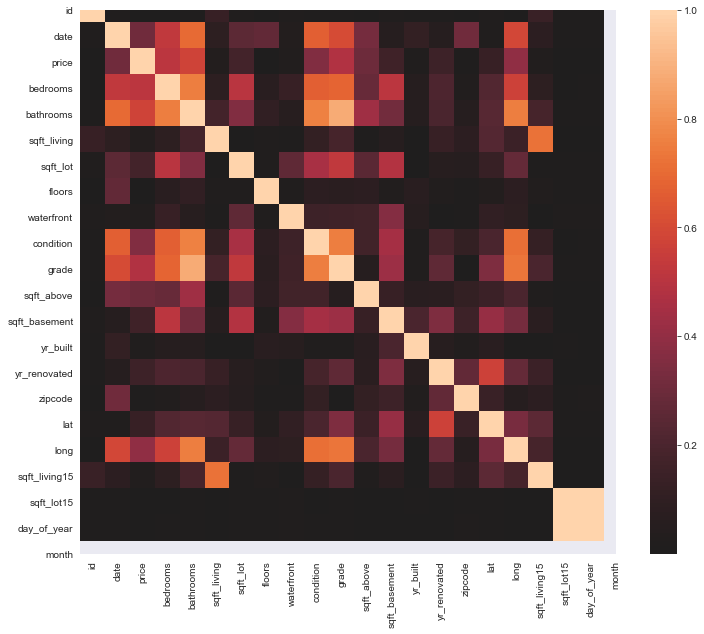

In [124]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values);

#### Results from Heatmap:
- Bedrooms seem to have a relationship with condition, grade, longitude, condition, and bathrooms.
- Bathrooms seem to have a relationship with longitude, grade, condition, and bedrooms. Additionally its relationship with price is interesting. 
- Condition and grade seem to have a relationship with longitude

#### Just for fun, let's run the Heatmap again but with annotations. 

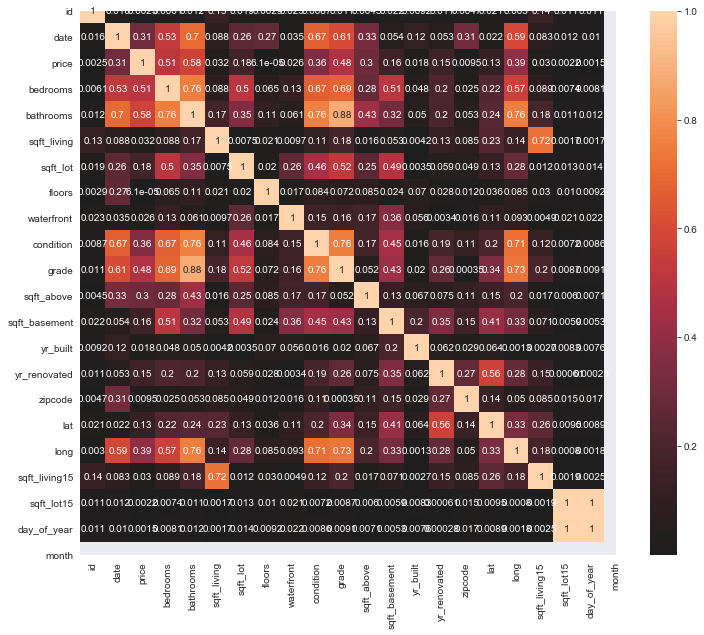

In [125]:
plt.figure(figsize=(12,10))
sns.heatmap(abs(df.corr()), center=.0, xticklabels=df.columns.values, yticklabels=df.columns.values, annot=True);

### Updated results from Heatmap:
- Bedrooms seem to have a relationship with condition (0.67), grade (0.69), longitude (0.57), condition (0.67), and bathrooms (0.76).
- Bathrooms seem to have a relationship with longitude (0.76), grade (0.88), condition (0.76), and bedrooms (0.76). Additionally its relationship with price is interesting (0.58).
- Condition and grade seem to have a relationship with longitude (0.71 and 0.73 respectively).

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 22 columns):
id               21143 non-null int64
date             21143 non-null datetime64[ns]
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       21143 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     21143 non-null float64
zipcode          21143 non-null int64
lat              21143 non-null float64
long             21143 non-null float64
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
day_of_year      21143 non-null int64
month            21143 non-null int64
dtypes: datetime64[ns](1), flo